In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

CHUNKS = [i*5 for i in range(0, 11)]
RETRY_EXPERIMENT = 5
SCORE_DIR = ["results_tolomei", "results_rfc_4", "results_rfc_1"]
LABELS = ["library(Tolomei et al., 4 processes)", "library(proposed, 4 processes)", "library(proposed, 1 process)"]

TRUE_NEGATIVES = [
    1819,
    3606,
    5364,
    7167,
    8947,
    10704,
    12495,
    14242,
    16130,
    17916
]

# colors = list(mcolors.BASE_COLORS.keys())
colors = ['r', 'b', 'g', 'c']
colors

['r', 'b', 'g', 'c']

In [30]:
scores = {}


for score_dir in SCORE_DIR:
    scores[score_dir] = []
    for chunk in CHUNKS:
        if chunk == 0:
            scores[score_dir].append([[0.0,0.0,0.0,0.0,0.0] for _ in range(RETRY_EXPERIMENT)])
            continue
        scores[score_dir].append([])
        for i in range(RETRY_EXPERIMENT):
            if score_dir == "results_tolomei":
                filepath = os.path.join(score_dir ,f"tolomei_part_{chunk}_{i}.txt")
            elif score_dir in ["results_rfc_1", "results_rfc_4"]:
                filepath = os.path.join(score_dir ,f"rfc_part_{chunk}_{i}.txt")
            with open(filepath) as f:
                content = f.readlines()
                scores[score_dir][-1].append([float(c.strip()) for c in content])
    
    scores[score_dir] = np.array(scores[score_dir])
    
# scores

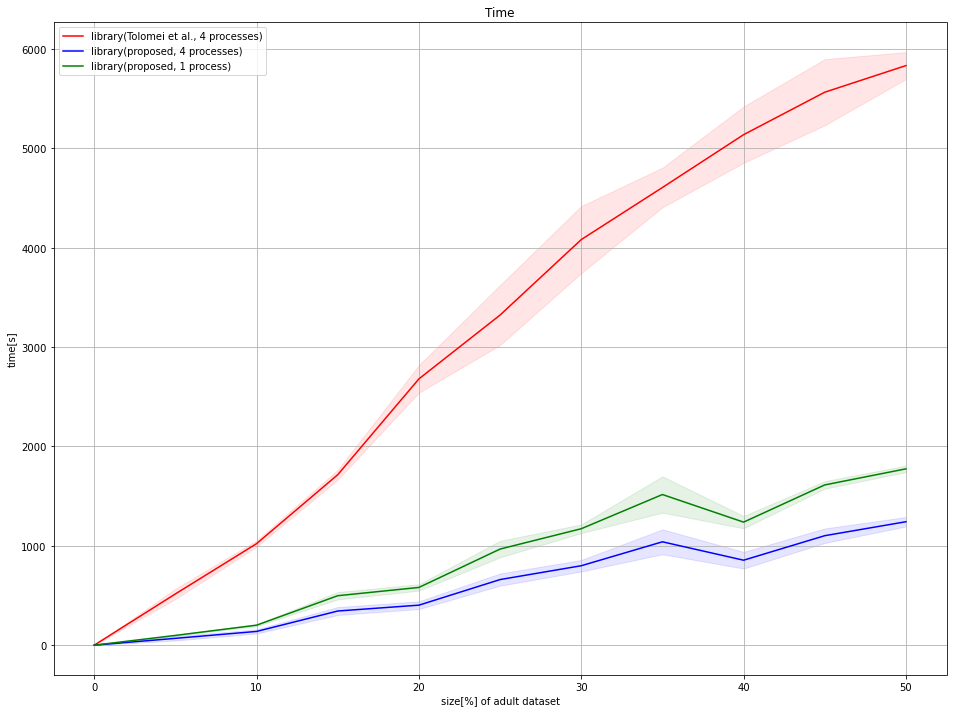

In [31]:
STD_DIVIDER = 0.1
fig = plt.figure(figsize=(16,12))

for no, score_dir in enumerate(SCORE_DIR):
    mean_time = np.mean(scores[score_dir][:, :, 4], axis=1)
    stds = np.std(scores[score_dir][:, :, 4], axis=1) / STD_DIVIDER

    plt.plot(CHUNKS, mean_time, color=colors[no], label=LABELS[no])
    plt.fill_between(CHUNKS, mean_time-stds, mean_time+stds, alpha=.1, color=colors[no])

plt.title("Time")
plt.ylabel("time[s]")
plt.xlabel("size[%] of adult dataset")
plt.legend()
plt.grid()
plt.show()

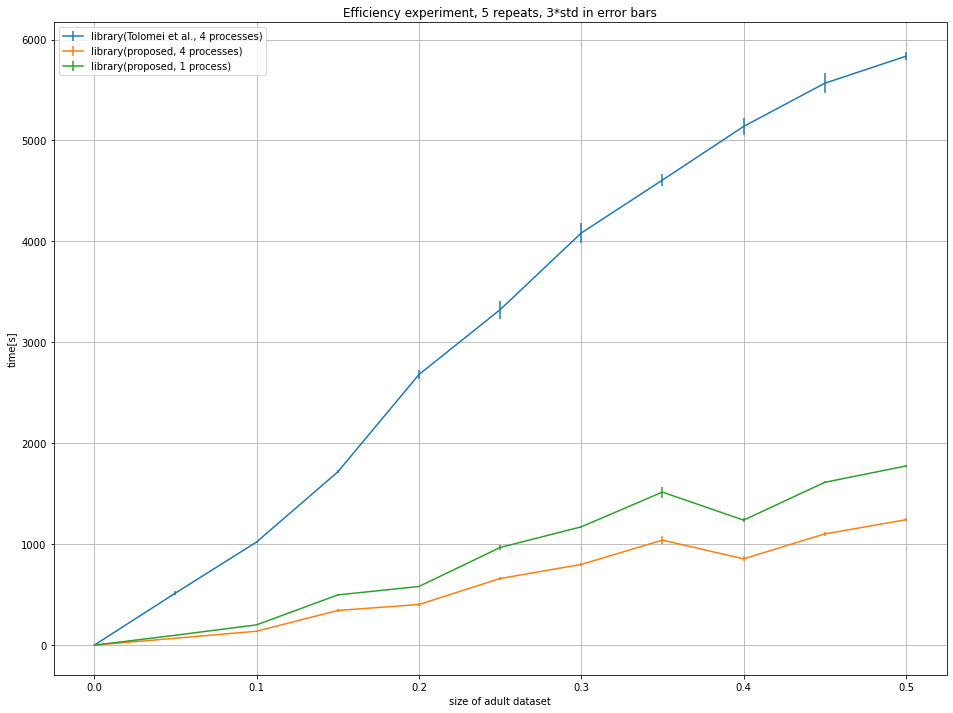

In [37]:
STD_MULTIPLIER = 3

fig = plt.figure(figsize=(16,12))

for no, score_dir in enumerate(SCORE_DIR):

    x = np.array(CHUNKS) / 100
    y = np.mean(scores[score_dir][:, :, 4], axis=1)
    yerr = np.std(scores[score_dir][:, :, 4], axis=1)

    plt.errorbar(x, y, yerr=yerr*STD_MULTIPLIER, label=LABELS[no])
    
plt.title(f"Efficiency experiment, {RETRY_EXPERIMENT} repeats, {STD_MULTIPLIER}*std in error bars")
plt.ylabel("time[s]")
plt.xlabel("size of adult dataset")
plt.legend()
plt.grid()
plt.show()

In [88]:
for no, chunk in enumerate(CHUNKS[1:]):
    print(f"{(chunk/100):1.2f}", end='')
    print(f" ({int(scores['results_rfc_4'][no+1, 0, 0])})", end=' &')
    print(f" {TRUE_NEGATIVES[no]}", end=' &')
    for noo, score_dir in enumerate(SCORE_DIR):
        print(f" {np.mean(scores[score_dir][no+1, :, 4]):1.2f}({np.std(scores[score_dir][no+1, :, 4]):1.2f})", end='')
        if noo < len(SCORE_DIR) - 1:
            print(" &", end='')
        else:
            print(r" \\")


0.05 (2442) & 1819 & 516.05(5.16) & 68.48(2.16) & 98.08(0.42) \\
0.10 (4884) & 3606 & 1022.02(3.16) & 138.07(2.10) & 201.11(0.98) \\
0.15 (7326) & 5364 & 1716.14(4.91) & 343.68(4.00) & 497.74(3.71) \\
0.20 (9768) & 7167 & 2680.67(13.85) & 402.59(3.90) & 581.04(3.22) \\
0.25 (12210) & 8947 & 3323.32(30.20) & 660.29(6.16) & 967.39(8.33) \\
0.30 (14652) & 10704 & 4082.87(33.73) & 799.47(5.80) & 1172.04(4.36) \\
0.35 (17094) & 12495 & 4607.16(19.92) & 1040.33(12.53) & 1516.26(18.26) \\
0.40 (19536) & 14242 & 5138.86(28.36) & 855.12(8.38) & 1238.37(6.19) \\
0.45 (21978) & 16130 & 5566.42(33.30) & 1101.91(7.29) & 1613.12(3.80) \\
0.50 (24421) & 17916 & 5834.34(13.55) & 1242.46(4.75) & 1774.80(3.25) \\


In [55]:
accelerate = np.mean(scores["results_rfc_1"][1:, :, 4] / scores["results_rfc_4"][1:, :, 4])
accelerate_std = np.std(scores["results_rfc_1"][1:, :, 4] / scores["results_rfc_4"][1:, :, 4])
efficiency = accelerate / 4

print(accelerate, accelerate_std, efficiency)

1.451182177539823 0.02177273098351013 0.36279554438495576
